In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv("output.csv") # dataset Jonathan created for extra data about harvey
df.head()

,Latitude,Longitude,Elevation,Dataset,FilePath,ContainingFolder,Status
0,30.987438,-93.528502,30.068228,ned10m,DamageDetection\damage\-93.528502_30.987438.jpeg,DamageDetection,damaged
1,30.988157,-93.530200,29.918272,ned10m,DamageDetection\damage\-93.5302_30.988157.jpeg,DamageDetection,damaged
2,30.982944,-93.539510,29.212812,ned10m,DamageDetection\damage\-93.53950999999999_30.9...,DamageDetection,damaged
3,30.982434,-93.539521,29.003891,ned10m,DamageDetection\damage\-93.539521_30.982434.jpeg,DamageDetection,damaged
4,30.982689,-93.540151,29.006647,ned10m,DamageDetection\damage\-93.540151_30.982689.jpeg,DamageDetection,damaged


In [51]:
# transform
df['Damaged'] = df['Status'].map({'damaged': True, 'undamaged': False})
df.head()

,Latitude,Longitude,Elevation,Dataset,FilePath,ContainingFolder,Status,Damaged
0,30.987438,-93.528502,30.068228,ned10m,DamageDetection\damage\-93.528502_30.987438.jpeg,DamageDetection,damaged,True
1,30.988157,-93.530200,29.918272,ned10m,DamageDetection\damage\-93.5302_30.988157.jpeg,DamageDetection,damaged,True
2,30.982944,-93.539510,29.212812,ned10m,DamageDetection\damage\-93.53950999999999_30.9...,DamageDetection,damaged,True
3,30.982434,-93.539521,29.003891,ned10m,DamageDetection\damage\-93.539521_30.982434.jpeg,DamageDetection,damaged,True
4,30.982689,-93.540151,29.006647,ned10m,DamageDetection\damage\-93.540151_30.982689.jpeg,DamageDetection,damaged,True


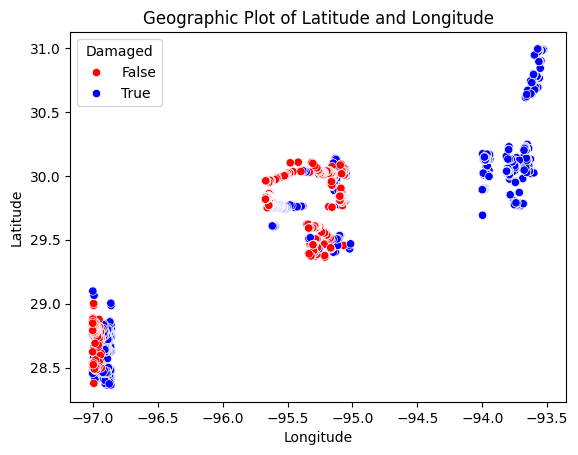

In [52]:
sns.scatterplot(data=df, x='Longitude', y='Latitude',
                hue='Damaged', palette={True: 'blue', False: 'red'}, legend='full')
plt.title('Geographic Plot of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

This looks quite striking! Damage vs no damage seems to be almost entirely dependent on neighborhood, nothing to do with the images themselves. Intuitively this makes sense. Lets see if we can do a k nearest neighbors super simple model and see what accuracy it gets

In [53]:
new_df = df[df['Longitude'] <= -94.5]
new_df.head()

,Latitude,Longitude,Elevation,Dataset,FilePath,ContainingFolder,Status,Damaged
1726,29.466886,-95.013655,0.775253,ned10m,DamageDetection\damage\-95.013655_29.466886.jpeg,DamageDetection,damaged,True
1727,29.467251,-95.013922,0.654617,ned10m,DamageDetection\damage\-95.013922_29.467251.jpeg,DamageDetection,damaged,True
1728,29.468488,-95.014416,1.507639,ned10m,DamageDetection\damage\-95.014416_29.468488.jpeg,DamageDetection,damaged,True
1729,29.467989,-95.014443,0.704202,ned10m,DamageDetection\damage\-95.014443_29.467989000...,DamageDetection,damaged,True
1730,29.465100,-95.014494,1.022325,ned10m,DamageDetection\damage\-95.014494_29.4651.jpeg,DamageDetection,damaged,True


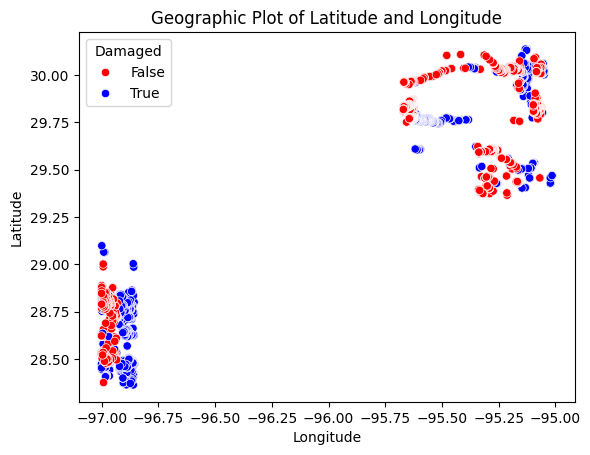

In [54]:
sns.scatterplot(data=new_df, x='Longitude', y='Latitude',
                hue='Damaged', palette={True: 'blue', False: 'red'}, legend='full')
plt.title('Geographic Plot of Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

X = new_df[['Latitude', 'Longitude']] 
y = new_df['Damaged'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

for n_neighbors in range(5,105,5):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Neighbors: {n_neighbors}\tAccuracy: {accuracy * 100:.2f}%")


Neighbors: 5	Accuracy: 50.37%
Neighbors: 10	Accuracy: 55.66%
Neighbors: 15	Accuracy: 55.60%
Neighbors: 20	Accuracy: 57.18%
Neighbors: 25	Accuracy: 57.20%
Neighbors: 30	Accuracy: 57.85%
Neighbors: 35	Accuracy: 57.84%
Neighbors: 40	Accuracy: 59.02%
Neighbors: 45	Accuracy: 58.76%
Neighbors: 50	Accuracy: 59.65%
Neighbors: 55	Accuracy: 59.13%
Neighbors: 60	Accuracy: 59.82%
Neighbors: 65	Accuracy: 60.07%
Neighbors: 70	Accuracy: 60.56%
Neighbors: 75	Accuracy: 60.22%
Neighbors: 80	Accuracy: 60.74%
Neighbors: 85	Accuracy: 60.66%
Neighbors: 90	Accuracy: 60.61%
Neighbors: 95	Accuracy: 60.62%
Neighbors: 100	Accuracy: 60.74%


Ok so 64% isn't great... Now what about a simple neural network?

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = new_df[['Latitude', 'Longitude', 'Elevation']]
y = new_df['Damaged'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Single output neuron for binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Epoch 1/30


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


717/717 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - accuracy: 0.6163 - loss: 0.6399 - val_accuracy: 0.6229 - val_loss: 0.5784
Epoch 2/30
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 405us/step - accuracy: 0.6277 - loss: 0.5800 - val_accuracy: 0.6290 - val_loss: 0.5669
Epoch 3/30
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 404us/step - accuracy: 0.6219 - loss: 0.5729 - val_accuracy: 0.6382 - val_loss: 0.5646
Epoch 4/30
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.6322 - loss: 0.5646 - val_accuracy: 0.6349 - val_loss: 0.5620
Epoch 5/30
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.6281 - loss: 0.5652 - val_accuracy: 0.6281 - val_loss: 0.5597
Epoch 6/30
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 400us/step - accuracy: 0.6311 - loss: 0.5634 - val_accuracy: 0.6346 - val_loss: 0.5585
Epoch 7/30
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 403us/step - accuracy: 0.6259 - loss: 0.5583 - val_accuracy: 0.6279 - val_loss: 0.5581
Epoch 8/30
717/717 ━━━━━━━━━━━━━━━━━━━━ 0s 408us/step - accuracy: 0.6297 - loss: 0.5593 - val_accurac

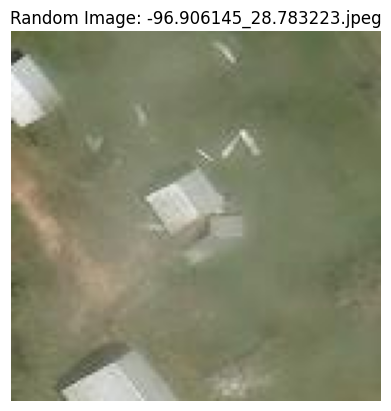

In [57]:
import matplotlib.pyplot as plt
import os
import random

# Define the path to the directory containing images
image_directory = 'bad_images'

# Get a list of all image files in the directory
image_files = [f for f in os.listdir(image_directory) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif'))]

# Check if there are images in the directory
if image_files:
    # Select a random image
    random_image = random.choice(image_files)
    
    # Load and display the image
    image_path = os.path.join(image_directory, random_image)
    image = plt.imread(image_path)
    
    plt.imshow(image)
    plt.axis('off')  # Hide the axes for a cleaner display
    plt.title(f"Random Image: {random_image}")  # Optional: Show the image filename
    plt.show()
else:
    print("No images found in the specified directory.")